# Aula 05 - Exercício 04

### Alunos:
 - Bruno Gomes Coelho       - 9791160
 - Bruno Mendes da Costa - 9779433
 

In [1]:
!git clone https://github.com/BrunoXD/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
%cd MachineLearning/

/content/MachineLearning


In [3]:
!ls

Aula05-Exercicio04.ipynb  query0.png  query2.png  V.png
inv_V.png		  query1.png  query4.png


## Perceptron e Data augmentation 
Neste exercicio utilizaremos o classificador Perceptron para classificar dois dígitos. No código abaixo os dois digitos são carregados e exibidos lado a lado.

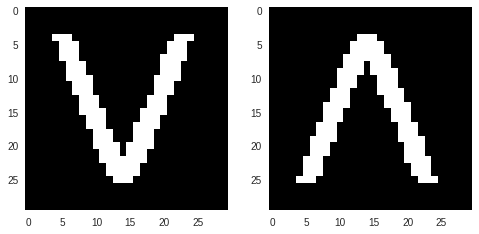

In [4]:
from skimage.io import imread
from matplotlib import pyplot as plt

SEED = 42

# Lendo as duas imagens originais
V = imread("V.png", as_grey=True)
V_inv = imread("inv_V.png", as_grey=True)

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show()



---

- Dado o código acima, aplique ruído (random_nosie) no primeiro símbolo e rotacione (transform.rotate) em 25º o segundo símbolo antes de exibi-los.
  - Dica: Para o `random_noise` utilize parametro `mode='pepper' ` e  para `transform.rotate` utilize `preserve_range=True, mode='constant', cval=1`

Text(0.5, 1.0, 'Rotacionada')

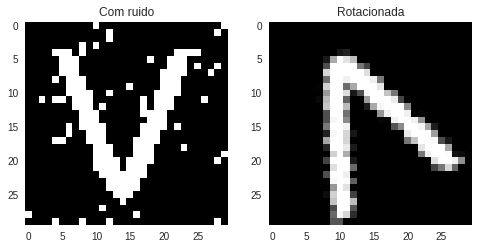

In [5]:
from skimage.util import random_noise
from skimage import transform


fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(1, 2, 1)
plt.grid(False)
plt.imshow(random_noise(V, mode="pepper", seed=42))
plt.title("Com ruido")

# Exibindo segunda imagem
fig.add_subplot(1, 2, 2)
plt.grid(False)
plt.imshow(transform.rotate(V_inv, angle=25, mode="constant", cval=1, preserve_range=True))
plt.title("Rotacionada")



---

- Agora defina a função `gen_data` abaixo. A função recebe como parâmetros: uma imagem base (v ou v invertido), a quantidade de dados artificiais a serem gerados, a classe da imagem base passada e uma lista de dados e labels. A função deve concatenar (`append`) as imagens geradas na lista `data` e suas respectivas classes na lista `target`.

  - Dica: Utilize a função `random.uniform(-a, a)` para gerar valores aleatórios entre -a e a para criar angulos de rotação variados.
  - Dica: Utilize valores diferentes para o parâmetro `seed` do random_noise para produzir resultados diferentes

In [0]:
import random

random.seed(SEED)


In [0]:
def gen_data(base_image, quantity, label, data, target):
    MAX_ANGLE = 25
    
    for _ in range(quantity):
        angle = random.uniform(-MAX_ANGLE, MAX_ANGLE)
        new_img = transform.rotate(base_image, angle=angle, mode="constant", 
                                   cval=1, preserve_range=True)
        new_img = random_noise(new_img, mode="pepper", seed=random.randint(0, 10000))
        data.append(new_img)
        target.append(label)
        



---


- Edite a linha abaixo do comentário para exibir uma imagem 4x4 do dataset criado acima.

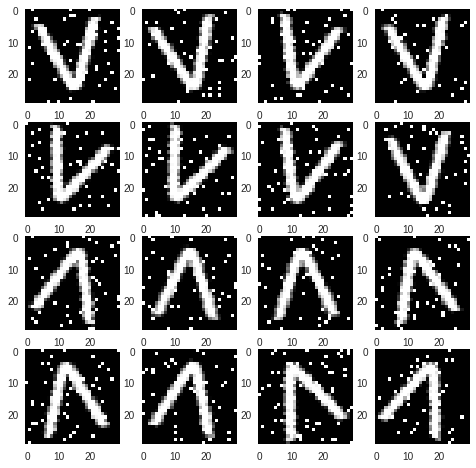

In [8]:
import numpy as np

x = []
y = []

gen_data(V, 8 , 0, x, y)
gen_data(V_inv, 8, 1, x, y)
x = np.asarray(x)
y = np.asarray(y)

############################

fig = plt.figure(figsize=(8, 8))

for idx, xi in enumerate(x, 1):
    fig.add_subplot(4, 4, idx)
    plt.imshow(xi)
    plt.grid(False)





---

- Separe o dataset criado em 12 imagens de treinamento e 4 imagens de teste utilizando a função `train_test_split`. Depois treine um classificador do tipo Perceptron no conjunto de treino. Calcule a acurácia para os conjuntos de treino e teste.

  - Dica: Você deve transformar as dimensões do conjunto de entrada para utilizar o Perceptron. Uma observação do conjunto é uma matriz 30x30. Para aplicar essa matriz no perceptron, você deve transformá-la em um vetor com 30x30 =900 elementos. Para isso utilize a função reshape da biblioteca numpy para transformar o conjunto x por inteiro.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


x = x.reshape(16, -1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=12, 
                                                   shuffle=True, random_state=SEED)

mlp = Perceptron(random_state=SEED)
mlp.fit(x_train, y_train)

y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

print(f"Acurácia do treino: {100*accuracy_score(y_train, y_train_pred)} %")
print(f"Acurácia do test: {100*accuracy_score(y_test, y_test_pred)} %")



Acurácia do treino: 100.0 %
Acurácia do test: 100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)




---

Devido à natureza da função threshold, podemos ter uma falsa sensação de quê nosso classificador classifica os exemplos com a mesma confiança. Porém, isso não é verdadeiro. No caso do perceptron utilizado, podemos ter uma medida da confiança do classificador para um dado exemplo calculando a distância relativa desse exemplo para o hiperplano separador. Essa medida pode ser obtida através da função `decision_function(X)`

- Utilize a função  `decision_function(X)` para calcular a distância dos exemplos query0.png ~ query4.png ao hiperplano separador do classificador treinado no item anterior e analise a relação entre distância x confiança x qualidade do símbolo na imagem.

In [10]:
imgs = []
names = []
for i in range(5):
    if i != 3:
        name = f"query{i}.png"
        names.append(name)
        imgs.append(imread(name, as_grey=True))

imgs = np.asarray(imgs)
imgs = imgs.reshape(len(imgs), -1)

for name, label, dist in zip(names, mlp.predict(imgs), mlp.decision_function(imgs)):
    print(f"Imagem {name} predita como {label} com distancia {dist} do hyperplano.")
    

Imagem query0.png predita como 0 com distancia -1.1364827090792158 do hyperplano.
Imagem query1.png predita como 1 com distancia 9.458307985204955 do hyperplano.
Imagem query2.png predita como 1 com distancia 34.29315756836227 do hyperplano.
Imagem query4.png predita como 0 com distancia -4.5810564734675046 do hyperplano.


A imagem query2 que é bem parecida com um V, foi facilmente classificada (distante do hyperplano).